In [1]:
import geopandas as gpd

school_districts = gpd.read_file('school_districts.geojson')

# Print the first row of school districts GeoDataFrame and the crs
print(school_districts.head(1))
print(school_districts.crs)

# Convert the crs to epsg:3857
school_districts.geometry = school_districts.geometry.to_crs(epsg = 3857)
                        
# Print the first row of school districts GeoDataFrame and the crs again
print(school_districts.head(1))
print(school_districts.crs)

   first_name       city    zip                           email state  \
0  Dr. Sharon  Nashville  37218  gentryfordistrict1@comcast.net    TN   

  last_name          address position term_expir district         phone  \
0    Gentry  6108 Beals Lane   Member       2016        1  615-268-5269   

                                            geometry  
0  MULTIPOLYGON (((-86.77136 36.38357, -86.77134 ...  
EPSG:4326
   first_name       city    zip                           email state  \
0  Dr. Sharon  Nashville  37218  gentryfordistrict1@comcast.net    TN   

  last_name          address position term_expir district         phone  \
0    Gentry  6108 Beals Lane   Member       2016        1  615-268-5269   

                                            geometry  
0  MULTIPOLYGON (((-9659344.056 4353528.767, -965...  
EPSG:3857


In [4]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

art = pd.read_csv('public_art.csv')
neighborhoods = gpd.read_file('neighborhoods.geojson')

# Print the first few rows of the art DataFrame
print(art.head())

# Create a geometry column from lng & lat
art['geometry'] = art.apply(lambda x: Point(float(x.Longitude), float(x.Latitude)), axis=1)

# Create a GeoDataFrame from art and verify the type
art_geo = gpd.GeoDataFrame(art, crs = neighborhoods.crs, geometry = art.geometry)
print(type(art_geo))

                             Title                                 Last Name  \
0          [Cross Country Runners]                                     Frost   
1  [Fourth and Commerce Sculpture]                                    Walker   
2              12th & Porter Mural                                   Kennedy   
3                A Splash of Color  Stevenson and Stanley and ROFF (Harroff)   
4             A Story of Nashville                                    Ridley   

                  First Name                           Location  \
0                      Miley     4001 Harding Rd., Nashville TN   
1                        Lin  333 Commerce Street, Nashville TN   
2                        Kim                  114 12th Avenue N   
3  Doug and Ronnica and Lynn                   616 17th Ave. N.   
4                       Greg    615 Church Street, Nashville TN   

                                              Medium       Type  \
0                                             Bro

In [6]:
# Spatially join art_geo and neighborhoods and using the contains op

art_containing_neighborhoods = gpd.sjoin(art_geo, neighborhoods, predicate = 'contains')

# Print the shape property of art_containing_neighborhoods
print(art_containing_neighborhoods.shape)

(0, 13)


In [8]:
# import packages
import geopandas as gpd
import pandas as pd

# Spatially join neighborhoods with art_geo
neighborhood_art = gpd.sjoin(art_geo, neighborhoods, predicate = 'within')

# Print the first few rows
print(neighborhood_art.head())

                                Title Last Name First Name  \
1     [Fourth and Commerce Sculpture]    Walker        Lin   
4                A Story of Nashville    Ridley       Greg   
21                        Chet Atkins     Faxon    Russell   
22  Children's Chairs For The Seasons    McGraw     Deloss   
34                    Foliated Scroll   Bloomer       Kent   

                                             Location  \
1                   333 Commerce Street, Nashville TN   
4                     615 Church Street, Nashville TN   
21  Corner of Fifth Avenue North and Union Street,...   
22                    615 Church Street, Nashville TN   
34                    615 Church Street, Nashville TN   

                                         Medium       Type  \
1                                           NaN  Sculpture   
4                      Hammered copper repousse     Frieze   
21  Bronze stool and guitar on a granite plynth  Sculpture   
22                 Mixed Media - woo

In [10]:
# Get name and title from neighborhood_art and group by name
neighborhood_art_grouped = neighborhood_art[['name', 'Title']].groupby('name')

# Aggregate the grouped data and count the artworks within each polygon
print(neighborhood_art_grouped.agg('count').sort_values(by = 'Title', ascending = False))

                          Title
name                           
Urban Residents              22
Lockeland Springs             3
Edgehill (ONE)                2
Germantown                    2
Hillsboro-West End            2
Inglewood                     2
Sunnyside                     2
Chestnut Hill (TAG)           1
Historic Edgefield            1
McFerrin Park                 1
Renraw                        1
Wedgewood Houston (SNAP)      1


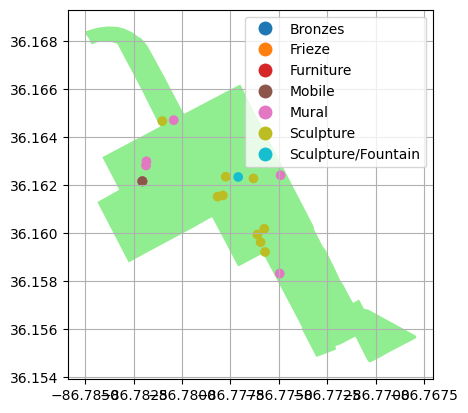

In [21]:
# Create urban_art from neighborhood_art where the neighborhood name is Urban Residents
urban_art = neighborhood_art.loc[neighborhood_art.name == "Urban Residents"]

# Get just the Urban Residents neighborhood polygon and save it as urban_polygon
urban_polygon = neighborhoods.loc[neighborhoods.name == "Urban Residents"]

# Plot the urban_polygon as ax  
ax = urban_polygon.plot(color = 'lightgreen')

# Add a plot of the urban_art and show it
urban_art.plot( ax = ax, column = 'Type', legend = True, figsize = (10, 10))
plt.grid()
plt.show()